In [122]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

In [123]:
pred = np.load("./pred/ung_133_07_c0001_segm_42.png.npy")
gt = imread("./pred/ung_133_07_c0001_segm_42.png")

In [124]:
pred = pred.squeeze()

In [125]:
predy = pred.argmax(2).squeeze()

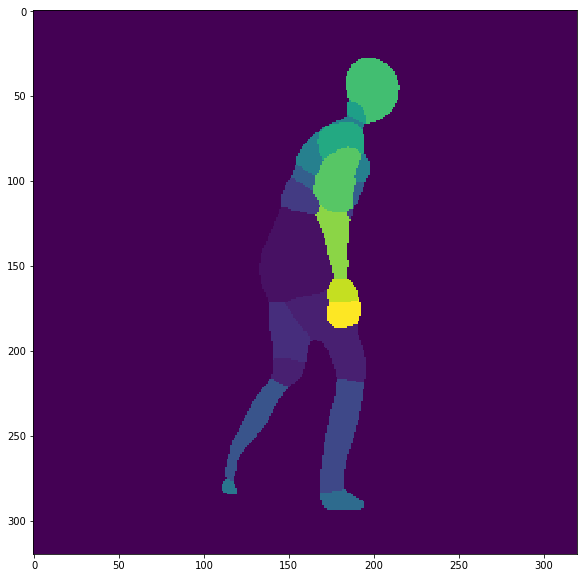

In [126]:
plt.figure(figsize=(10,10))
plt.imshow(predy)

In [127]:
np.unique(predy)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 13, 14, 16, 17, 19, 21,
       23])

In [128]:
len(np.unique(predy))

18

In [129]:
l = len(np.unique(predy))

## Analysis

In [130]:
x,y = np.where(predy==1)

In [131]:
pred[x[0],y[0],:]

array([ 2.0446677 ,  2.739454  , -2.7032619 , -4.306618  ,  2.3976746 ,
       -3.1273875 , -3.2284694 , -1.9441148 , -4.7517424 , -4.2154026 ,
       -3.5228617 , -5.773826  , -2.7951102 , -3.516339  , -4.957579  ,
       -3.5635555 , -3.5036306 , -2.9100678 , -0.26114988, -2.6521802 ,
       -0.26174116, -4.6015444 , -2.8772957 , -4.1437826 , -3.0483499 ],
      dtype=float32)

In [132]:
matrix_values = np.zeros((l-1,25))
matrix_gt = np.zeros((l-1,25))

In [133]:
for i in range(l-1):
    x,y = np.where(predy==np.unique(predy)[i])
    matrix_values[i,:] = pred[x[0],y[0],:]
    a = np.zeros(25)
    a[i] = 1
    matrix_gt[i,:] = a
        

In [134]:
matrix_values

array([[ 6.87911892, -2.64057374, -3.08065963, -2.87960315, -4.02018547,
        -2.78438616, -2.78104806, -3.24468255, -2.7452929 , -2.50143099,
        -3.01476908, -2.59213638, -1.54695308, -4.28009367, -4.03058624,
        -4.29299879, -1.84998846, -4.00684357, -4.01977491, -3.49622679,
        -3.25865841, -2.94242454, -2.60674095, -2.02664852, -1.71801758],
       [ 2.04466772,  2.73945403, -2.70326185, -4.30661821,  2.39767456,
        -3.12738752, -3.22846937, -1.9441148 , -4.75174236, -4.2154026 ,
        -3.52286172, -5.77382612, -2.79511023, -3.51633906, -4.95757914,
        -3.56355548, -3.50363064, -2.9100678 , -0.26114988, -2.65218019,
        -0.26174116, -4.60154438, -2.87729573, -4.14378262, -3.04834986],
       [ 0.07478571,  2.6757338 ,  2.7885232 , -1.24613106, -2.86441803,
        -2.70169663, -6.4489727 , -4.65469074, -1.8157115 , -4.21474838,
        -3.71603107, -4.10083246, -4.39661694, -6.25296974, -4.11733961,
        -5.25426054, -5.16539812, -2.46189117, -4

In [195]:
loss_weight = np.array([0.1265395 , 0.97901945, 0.98779824, 0.98798795, 0.99297994,
       0.99004227, 0.9902172 , 0.99399384, 0.99761395, 0.99752619,
       0.99085405, 0.99956869, 0.99918055, 0.99838453, 0.99770222,
       0.99789736, 0.99134871, 0.99592386, 0.99592018, 0.99679445,
       0.99659237, 0.99884241, 0.99871236, 0.99932548, 0.99923426])

loss_weight_1 = np.array([0.00134934769594975,  0.0548351842469636,           0.0923963767207384,
           0.0952650592913482,
           0.156380870740497,
           0.113052936739173,
           0.116187279167639,
           0.181073044725212,
           0.405285806552916,
           0.400809143317001,
           0.122243562996140,
           1,
           0.941120945509562,
           0.560479631931825,
           0.415442280425244,
           0.464607162224048,
           0.130283282851676,
           0.255949048107327,
           0.263686918927640,
           0.316056007969892,
           0.309816548557251,
           0.684273567653671,
           0.651440097071119,
           0.904838636036523,
           0.865534010270693])

In [152]:
def grad_bad(matrix_line,loss_weight,gt):
    out = np.sum(np.exp(loss_weight*matrix_line),axis=1)
    inside = np.transpose(np.exp(loss_weight*matrix_line))/out -1
    print(inside.shape)
    return loss_weight*np.transpose(inside), gt*loss_weight*np.transpose(inside)

In [138]:
g, g_c = grad_bad(matrix_values,loss_weight,matrix_gt)

(25, 17)


In [165]:
def grad_good(matrix_line,loss_weight,gt):
    out = np.sum(np.exp(matrix_line),axis=1)
    inside = np.transpose(np.exp(matrix_line))/out -1
    print(inside.shape)
    return loss_weight*np.transpose(inside), gt*loss_weight*np.transpose(inside), np.transpose(inside)

In [198]:
g_g, g_cg, g_gg = grad_good(matrix_values,loss_weight,matrix_gt)
g_g_1, g_cg_1, g_gg_1 = grad_good(matrix_values,loss_weight_1,matrix_gt)


(25, 17)
(25, 17)


In [167]:
g_g

array([[-2.05692714e-04, -9.78947714e-01, -9.87751629e-01,
        -9.87930949e-01, -9.92961628e-01, -9.89979444e-01,
        -9.90154153e-01, -9.93954032e-01, -9.97548120e-01,
        -9.97442187e-01, -9.90804111e-01, -9.99491814e-01,
        -9.98962005e-01, -9.98370333e-01, -9.97684012e-01,
        -9.97883352e-01, -9.91188564e-01, -9.95905247e-01,
        -9.95901807e-01, -9.96763408e-01, -9.96553012e-01,
        -9.98788291e-01, -9.98636663e-01, -9.99190187e-01,
        -9.99050068e-01],
       [-9.97647768e-02, -5.64034778e-01, -9.85986201e-01,
        -9.87623261e-01, -6.93926865e-01, -9.88853884e-01,
        -9.89142877e-01, -9.90098222e-01, -9.97378001e-01,
        -9.97122815e-01, -9.90053181e-01, -9.99483619e-01,
        -9.97508482e-01, -9.97572294e-01, -9.97510149e-01,
        -9.97122962e-01, -9.90531883e-01, -9.94438230e-01,
        -9.74915332e-01, -9.94870077e-01, -9.75585769e-01,
        -9.98567885e-01, -9.97172938e-01, -9.98891374e-01,
        -9.97936194e-01],
    

# drawing

In [168]:
names = range(25)

In [169]:
g_g[-5,:]

array([-0.10868819, -0.97642034, -0.97722129, -0.9877527 , -0.99272235,
       -0.97492991, -0.98882807, -0.98833011, -0.97981576, -0.99306426,
       -0.63059975, -0.99283348, -0.99617321, -0.98970082, -0.61898293,
       -0.98472112, -0.99033577, -0.98072574, -0.99433792, -0.99333538,
       -0.99592315, -0.99731044, -0.99842563, -0.99810646, -0.99872052])

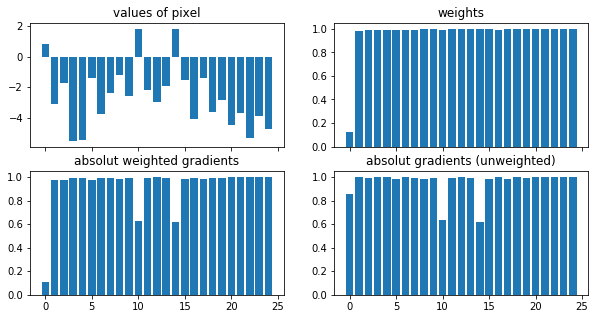

In [193]:
 f, ((ax3, ax2), (ax1, ax4)) = plt.subplots(2, 2,sharex='col')
f.set_size_inches((10,5))
ax1.bar(names,np.abs(g_g[-5,:]))
ax1.set_title("absolut weighted gradients")
ax2.bar(names, loss_weight)
ax2.set_title("weights")
ax3.bar(names, matrix_values[-5,:])
ax3.set_title("values of pixel")
ax4.bar(names, np.abs(g_gg[-5,:]))
ax4.set_title("absolut gradients (unweighted)")
f.savefig("./gradients_myw.png")

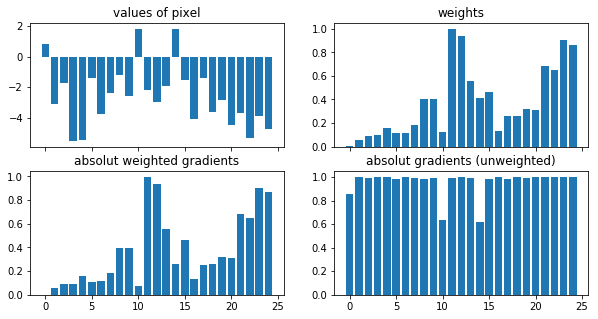

In [199]:
 f, ((ax3, ax2), (ax1, ax4)) = plt.subplots(2, 2,sharex='col')
f.set_size_inches((10,5))
ax1.bar(names,np.abs(g_g_1[-5,:]))
ax1.set_title("absolut weighted gradients")
ax2.bar(names, loss_weight_1)
ax2.set_title("weights")
ax3.bar(names, matrix_values[-5,:])
ax3.set_title("values of pixel")
ax4.bar(names, np.abs(g_gg_1[-5,:]))
ax4.set_title("absolut gradients (unweighted)")
f.savefig("./gradients_yyw.png")